In [24]:
import nltk


In [44]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
df = pd.read_csv("Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  str    
 1   category    162973 non-null  float64
dtypes: float64(1), str(1)
memory usage: 2.5 MB


In [25]:
df.isnull().sum() #checking null values

clean_text    0
category      0
dtype: int64

In [26]:
df = df.dropna(subset=['clean_text','category']) #handling null values by droping those rows
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [16]:
x = df['clean_text'] #input(tweets)
y = df['category'] #output(sentiment score)


In [10]:
!pip install scikit-learn


In [27]:
# converting tweets into numeric values
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
x_vec = vectorizer.fit_transform(x)

In [28]:
#training and test
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x_vec, y,test_size = 0.2, random_state = 42
)

In [29]:
#training model using logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
#evaluate
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      0.83      0.87      7152
         0.0       0.92      0.98      0.95     11067
         1.0       0.94      0.94      0.94     14375

    accuracy                           0.93     32594
   macro avg       0.92      0.91      0.92     32594
weighted avg       0.93      0.93      0.93     32594



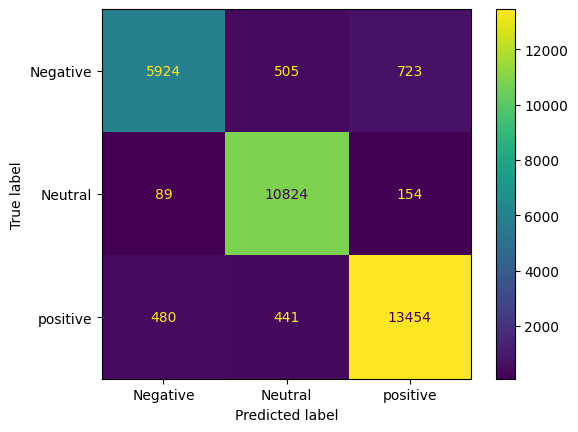

In [34]:
#visualizing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,
display_labels=["Negative","Neutral","positive"])
disp.plot()
plt.show()

In [39]:
#savinng the model
import joblib
joblib.dump(model, "sentiment_model.pkl")

['sentiment_model.pkl']

In [40]:
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [41]:
tweet = ["i hate this app"]
tweet_vec = vectorizer.transform(tweet)
print(model.predict(tweet_vec))

[-1.]


In [46]:
label_map = {
    -1 : "Negative",
     0 : "Neutral",
    +1 : "Positive"
}
prediction = model.predict(tweet_vec)[0]
print(label_map[prediction])

Negative


In [48]:
tweet1 = ["i love this app"]
tweet1_vec = vectorizer.transform(tweet1)
prediction = model.predict(tweet1_vec)[0]
print(label_map[prediction])

Positive


In [50]:
tweet2 = ["this app is borig"]
tweet2_vec = vectorizer.transform(tweet2)
prediction = model.predict(tweet2_vec)[0]
print(label_map[prediction])

Neutral


In [53]:
tweet3 = ["shit"]
tweet3_vec = vectorizer.transform(tweet3)
prediction = model.predict(tweet3_vec)[0]
print(label_map[prediction])

Negative


In [61]:
def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    label_map = {-1 : "Negative",0 : "Neutral",+1 : "Positive"}
    return label_map[prediction]

In [62]:
predict_sentiment("fuck you")

'Negative'